# Testing ONNX export

In [20]:
import numpy as np
import onnxruntime as rt
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

## Loading the Image

In [21]:
label_map = {'no_sub':0, 'sub':1}
val_label_map = {0:'no_sub', 1:'sub'}

def load_data():
    base_dir = '../examples'

    df = pd.DataFrame(columns = ['path', 'label'])

    for i in label_map.keys():
        entries = [os.path.join(base_dir, i, j) for j in os.listdir(os.path.join(base_dir, i))]
        temp_df = pd.DataFrame({'path':entries, 'label':i})
        df = pd.concat([df, temp_df], ignore_index=True)

    return df

test_df = load_data()
test_df.head()

,path,label
0,../examples/no_sub/image_113100812705960939083...,no_sub
1,../examples/no_sub/image_303474718164016996691...,no_sub
2,../examples/no_sub/image_922388219817853174655...,no_sub
3,../examples/no_sub/image_200533611763828138246...,no_sub
4,../examples/sub/image_189448974206662542797032...,sub


In [22]:
def load_image(path):
    img = Image.open(path)
    img = img.resize((256, 256))

    return np.array(img)

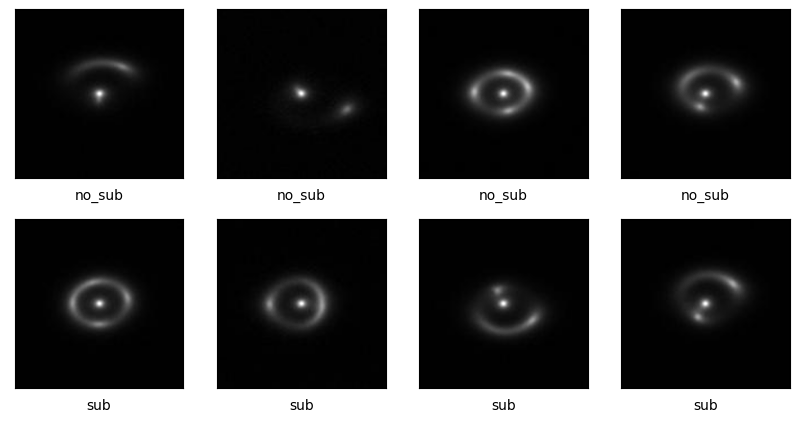

In [23]:
def show_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.xlabel(labels[i])
    plt.show()

images = [load_image(i) for i in test_df['path'][:8]]
labels = test_df['label'][:8]

show_images(images, labels)

## Predicting the class and comparing it to ground truth

In [32]:
onnx_path = '../model/model.onnx'
session = rt.InferenceSession(onnx_path)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

def predict(img):
    image = img.astype(np.float32).copy()
    image = image.reshape(1, 1, 256, 256)
    image = image / 255.0
    pred = session.run([output_name], {input_name: image})[0]
    pred = np.argmax(pred)
    return pred

preds = []
for i in range(len(images)):
    preds.append(predict(images[i]))

preds = [val_label_map[i] for i in preds]

['no_sub', 'no_sub', 'no_sub', 'no_sub', 'sub', 'sub', 'sub', 'sub']
['no_sub', 'no_sub', 'no_sub', 'no_sub', 'sub', 'sub', 'sub', 'sub']


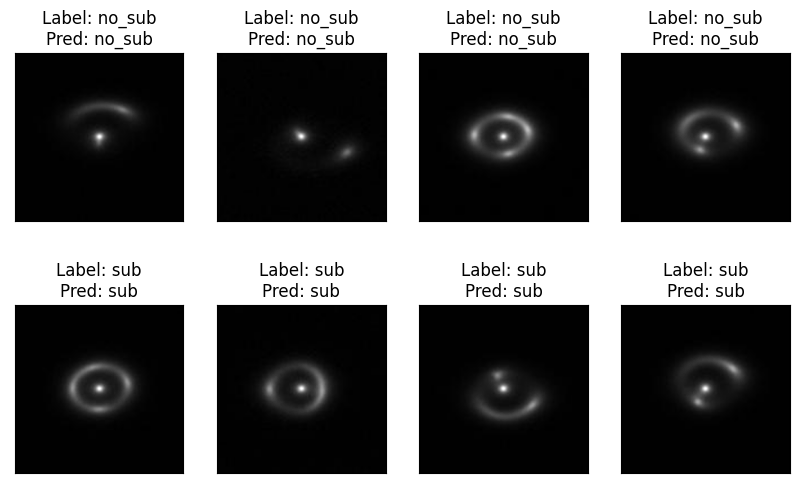

In [34]:
def show_images_with_pred(images, labels, preds):
    plt.figure(figsize=(10, 6))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}\nPred: {preds[i]}")
    plt.show()

show_images_with_pred(images, labels, preds)